<a href="https://colab.research.google.com/github/StevenMena/05MIAR---Aprendizaje_Supervisado/blob/main/Scripts_Temas/Tema4/Programa13_Regresion_KNN1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from math import sqrt
from sklearn import datasets, linear_model, metrics
from pprint import pprint
from sklearn.metrics import make_scorer, r2_score
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate, train_test_split, KFold
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectPercentile, f_regression
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Carga de datos.

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

X = data
y = target
print(np.shape(X))

(506, 13)


In [ ]:
# Métricas de evaluación.
metricas = {'MAE':  'neg_mean_absolute_error',
            'RMSE': make_scorer(lambda y, y_pred:
                      sqrt(metrics.mean_squared_error(y, y_pred)),
                      greater_is_better=False),
            'MAPE': make_scorer(lambda y, y_pred:
                      np.mean(np.abs((y - y_pred) / y)) * 100,
                      greater_is_better=False)}

### 1) PARTICIÓN EXTERNA DE DATOS

In [ ]:

# 1) Partición de datos externa
X_training, X_testing, y_training, y_testing = train_test_split(X,y,test_size=0.2,shuffle=True,random_state=42)
print(np.shape(X_training))
print(np.shape(X_testing))

(404, 13)
(102, 13)


### 2-5) ENTRENAMIENTO

In [ ]:
# 2) Extracción de características

In [ ]:
# 3) Estandarización de los datos de entrenamiento
standardizer = preprocessing.StandardScaler()
X_stdr = standardizer.fit_transform(X_training)

In [ ]:
# 4) Selección de atributos

In [ ]:
# 5) Construcción del algoritmo de aprendizaje.
k = 2
# Weights es el atributo que hace referencia a como se deben de tener en cuenta los vecinos en este caso si se pone distance 
# Se ponderas los vecinos por sus distancias el que tenga menor distancia 
reg = KNeighborsRegressor(n_neighbors = k, weights='distance', metric='euclidean', algorithm='ball_tree')

In [ ]:
# 5.1) Validación cruzada interna

#OJO AUI SIEMPRE VAN LOS ATRIBUTOS ESTANDARIZADOS
# Extraer MEAN +- STD del coeficiente de determinación (R2) para un cross validation de 5 bolsas aleatorias y semilla en 42
r2_cv_results = cross_val_score(reg,X_stdr,y_training,cv=KFold(n_splits=5, shuffle=True, random_state=42))
print("cross_val_R2:   %0.4f +/- %0.4f" % (r2_cv_results.mean(), r2_cv_results.std()))

cross_val_R2:   0.7469 +/- 0.1131


In [ ]:
# Extraer métricas MAE, MSE, RMSE y MAPE en un cross validation para 5 bolsas aleatorias y semilla en 42
metrics_cv_results = cross_validate(reg,X_training,y_training,cv=KFold(n_splits=5, shuffle=True, random_state=42),scoring=metricas)
pprint(metrics_cv_results)

{'fit_time': array([0.00120473, 0.00104046, 0.00127482, 0.00107479, 0.00065613]),
 'score_time': array([0.0082376 , 0.00212908, 0.00213337, 0.00151777, 0.00130582]),
 'test_MAE': array([-4.12353135, -4.08313972, -5.45566244, -5.31437285, -3.61430862]),
 'test_MAPE': array([-22.1548505 , -18.01388246, -23.47927786, -22.18658919,
       -18.00196191]),
 'test_RMSE': array([-5.72149584, -6.34282712, -8.49395922, -7.40288975, -4.70426306])}


In [ ]:
# Extraer las predicciones del cross validation de 5 bolsas aleatorias y semilla en 42
y_pred = cross_val_predict(reg,X_training,y_training,cv=KFold(n_splits=5, shuffle=True, random_state=42))
print(y_pred)

[14.57093471 20.67262228 23.7        13.45461427 21.70265937 23.53728567
 21.03869329 25.55318796 10.35594325 19.13713571 21.97575128 34.75269196
 32.98753138 12.46119751 35.0199713  14.70629829 22.83769355 22.09041645
 21.99756867 27.21680715 13.3528804  21.880641   26.06649088 22.77749876
 32.60504255 34.8619539  17.81865495 29.12908145 18.41165992 19.50578299
 14.9616671  16.03603645 16.56327158 12.39066155 20.97847157 26.30116639
 28.98822217 17.27620561 24.19602111 27.47368557 33.90738616 25.77037432
 22.38246956 28.8755144  23.83002893 14.21190558 16.66829109 29.33621933
 13.33709448 16.29813321 28.57222191 20.85840501 21.15047317 25.84550634
 22.40455846 38.34727604 21.45690676  8.62556998 36.62962165 22.93276349
 22.80592099 22.55168722 41.70842453 18.00981367 39.61306239 17.8
 16.54412406 18.11189734 16.49188051 19.46389675 23.88718906 33.71840294
 21.43409955 17.05374413 20.81896867 23.04758141 30.24397695 27.61496544
 14.44706669 11.81496774 11.35664947 16.03331215 32.500662

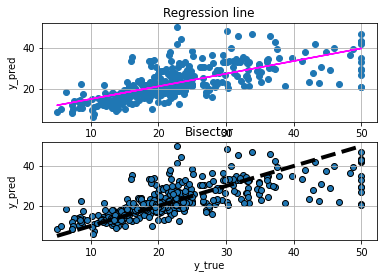

In [ ]:
# Crear una función que dadas las variables "y" e "y_pred" se visualice la bisectriz y la recta de regresión
def report_regression_graphics(y_true, y_pred):
    fig, ax = plt.subplots(2,1)

    # Plot linear fit
    ax[0].scatter(y_true, y_pred)
    ax[0].set_ylabel('y_pred')
    ax[0].set_title('Regression line')
    ax[0].grid()
    # overlay the regression line
    z = np.polyfit(np.float64(y_true), y_pred, 1)
    p = np.poly1d(z)
    ax[0].plot(y_true, p(y_true), color='magenta')

    # Plot bisectriz
    ax[1].scatter(y_true, y_pred, edgecolors=(0, 0, 0))
    ax[1].set_xlabel('y_true')
    ax[1].set_ylabel('y_pred')
    ax[1].set_title('Bisector')
    ax[1].plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=4)
    ax[1].grid()

# Visualiza la bisetriz y recta de regresión
report_regression_graphics(y_training,y_pred)

In [ ]:
# 5.2) Entrenamiento del modelo definitivo
model = reg.fit(X_stdr, y_training)

### 6-10) PREDICCIÓN

In [ ]:
# 6) Extracción de las características de test


In [ ]:
# 7) Estandarización de las característiacs de test
X_test_stdr = standardizer.transform(X_testing)

In [ ]:
# 8) Selección de los atributos de test 

In [ ]:
# 9) Predicción del conjunto de test
y_pred_test = model.predict(X_test_stdr)

MAE:  2.6974
MSE: 22.6257
RMSE: 4.7566
R2:   0.6915


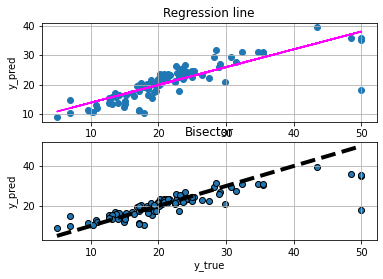

In [ ]:
# 10) Evaluación del modelo sobre el conjunto de test
MAE = metrics.mean_absolute_error(y_testing, y_pred_test)
MSE = metrics.mean_squared_error(y_testing, y_pred_test, squared=True)
RMSE = metrics.mean_squared_error(y_testing, y_pred_test, squared=False)
R2 = metrics.r2_score(y_testing, y_pred_test)

print('MAE:  %.4f' % MAE)
print('MSE: %.4f' % MSE)
print('RMSE: %.4f' % RMSE)
print('R2:   %.4f' % R2)

# Visualización de resultados
report_regression_graphics(y_testing, y_pred_test)

### ACTIVIDAD EXTRA

#### Entrenar el mejor modelo posible con el algoritmo KNN y comparar el resultado con el modelo OLS en test

In [ ]:
from tables.file import parameters
from sklearn.model_selection import GridSearchCV
# Definir parámetros de búsqueda
parameters = {'n_neighbors': np.arange(1,15),
              'weights': ('uniform','distance'),
              'metric': ('euclidean','manhattan','minkowski'),
              'algorithm': ('ball_tree', 'kd_tree', 'auto')}

# Aplicar el algoritmo de búsqueda
#vacío sin parámetros porque lo que nos interesa es conocer que alg queremos utilizar
reg = KNeighborsRegressor()

#Definimos el modelo, la métrica a comparar es r2
model = GridSearchCV(reg,parameters,cv=KFold(n_splits=5, shuffle=True, random_state=42),scoring='r2')

# Entrenar el modelo
model.fit(X_stdr,y_training)

# Extraer los mejores parámetros
model.best_params_

best_iter = model.best_index_

print('Best iteration: ', best_iter)

print('Best parameters: ', model.best_params_)

mean_r2 = model.cv_results_['mean_test_score'][best_iter]
std_r2 = model.cv_results_['std_test_score'][best_iter]


print('best R2:  %.4f +- %.4f' % (mean_r2,std_r2))



Best iteration:  3
Best parameters:  {'algorithm': 'ball_tree', 'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'distance'}
best R2:  0.7469 +- 0.1131


In [ ]:
# OPTIMIZATION OF HYPERPARAMETERS
parameters = {'OLS': {},
              'Lasso': {'alpha': (0.1, 1, 5, 10, 50, 100)},
              'Ridge': {'alpha': (0.1, 1, 5, 10, 50, 100)},
              'KNN': {'n_neighbors':range(10),
                      'weights':('uniform', 'distance'),
                      'metric': ('minkowski', 'euclidean', 'manhattan'),
                      'algorithm': ('ball_tree', 'kd_tree', 'auto')}}

In [ ]:
# ALGORITHMS
algs = {'OLS': linear_model.LinearRegression(),
        'Lasso': linear_model.Lasso(random_state=42),
        'Ridge': linear_model.Ridge(random_state=42),
        'KNN': KNeighborsRegressor()}

In [ ]:
# Entrenar cada algoritmo y comparar los resultados (a nivel cuantitativo y cualitativo) sobre el conjunto de test
from termcolor import colored
model = {}
for name, _ in algs.items():
    print(colored('Algorithm: ' + name, 'red'))
    score = make_scorer(r2_score)
    model_cv = GridSearchCV(algs[name], parameters[name], scoring=score, cv=5, return_train_score=True)
    model[name] = model_cv.fit(X_stdr, y_training)
    cv_res = model[name].cv_results_
    print('Best parameters: ', model[name].best_params_)
    best_iter = model[name].best_index_
    print('R2 score: %0.4f +/- %0.4f' % (cv_res['mean_test_score'][best_iter], cv_res['std_test_score'][best_iter]))
    print('------------')

    #El algoritmo mejor y con mejor scoring es KNN

Algorithm: OLS
Best parameters:  {}
R2 score: 0.7244 +/- 0.0635
------------
Algorithm: Lasso
Best parameters:  {'alpha': 0.1}
R2 score: 0.7180 +/- 0.0640
------------
Algorithm: Ridge
Best parameters:  {'alpha': 5}
R2 score: 0.7245 +/- 0.0633
------------
Algorithm: KNN
Best parameters:  {'algorithm': 'ball_tree', 'metric': 'minkowski', 'n_neighbors': 2, 'weights': 'distance'}
R2 score: 0.8223 +/- 0.0397
------------
